In [74]:
from tensorflow import keras
from keras.layers import Input, Dense, Reshape
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np
import os

In [62]:
def load_and_preprocess_data(data_dir):
    input_images = []
    target_images = []

    # Проход по всем файлам в папке
    for filename in os.listdir(data_dir):
        if filename.endswith("_test.png"):
            # Загрузка входного изображения
            input_img = load_img(os.path.join(data_dir, filename))
            input_img = img_to_array(input_img) / 255.0
            input_images.append(input_img)

            # Загрузка соответствующего эталонного изображения
            target_filename = filename.replace("_test.png", "_etalon.png")
            target_img = load_img(os.path.join(data_dir, target_filename))
            target_img = img_to_array(target_img) / 255.0
            target_images.append(target_img)

    input_images = np.array(input_images)
    target_images = np.array(target_images)

    return input_images, target_images

# Загрузка данных
input_images, target_images = load_and_preprocess_data("./data")

In [96]:
def build_image_to_image_network(input_shape=(48, 48, 3)):
    input_image = Input(shape=input_shape)

    # Развернуть входное изображение в одномерный вектор
    flattened = Reshape((48 * 48 * 3,))(input_image)

    # Полносвязные слои для преобразования изображения
    dense1 = Dense(2048, activation='relu')(flattened)
    dense2 = Dense(1024, activation='relu')(dense1)
    dense3 = Dense(512, activation='relu')(dense2)

    # Выходной слой, который имеет тот же размер, что и входное изображение
    output_image = Dense(48 * 48 * 3, activation='sigmoid')(dense3)

    # Восстановление размерности выходного изображения
    output_image = Reshape(input_shape)(output_image)

    model = Model(inputs=input_image, outputs=output_image)

    return model

# Создание экземпляра модели
model = build_image_to_image_network()

# Компиляция модели
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)  # Используем среднеквадратичную ошибку

Epoch 1/100
32/32 [==============================] - 3s 82ms/step - loss: 0.2483
Epoch 2/100
32/32 [==============================] - 3s 82ms/step - loss: 0.2458
Epoch 3/100
32/32 [==============================] - 3s 82ms/step - loss: 0.2382
Epoch 4/100
32/32 [==============================] - 3s 82ms/step - loss: 0.2228
Epoch 5/100
32/32 [==============================] - 3s 82ms/step - loss: 0.2075
Epoch 6/100
32/32 [==============================] - 3s 82ms/step - loss: 0.1939
Epoch 7/100
32/32 [==============================] - 3s 83ms/step - loss: 0.1818
Epoch 8/100
32/32 [==============================] - 3s 82ms/step - loss: 0.1714
Epoch 9/100
32/32 [==============================] - 3s 83ms/step - loss: 0.1621
Epoch 10/100
32/32 [==============================] - 3s 83ms/step - loss: 0.1535
Epoch 11/100
32/32 [==============================] - 3s 82ms/step - loss: 0.1452
Epoch 12/100
32/32 [==============================] - 3s 82ms/step - loss: 0.1380
Epoch 13/100
32/32 [=====

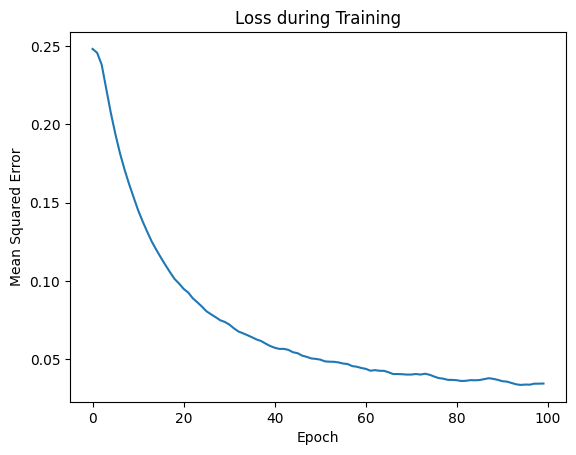

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 reshape_25 (Reshape)        (None, 6912)              0         
                                                                 
 dense_55 (Dense)            (None, 2048)              14157824  
                                                                 
 dense_56 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_57 (Dense)            (None, 512)               524800    
                                                                 
 dense_58 (Dense)            (None, 6912)              3545856   
                                                                 
 reshape_26 (Reshape)        (None, 48, 48, 3)         0  

In [97]:
epochs = 100  # Количество эпох обучения
batch_size = 32

history = model.fit(input_images, target_images, epochs=epochs, batch_size=batch_size)

# Вывод графика обучения
plt.plot(history.history['loss'])
plt.title('Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

model.summary()

# Сохранение модели
model.save('image_to_image_model.h5')

1/1 [==============================] - 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


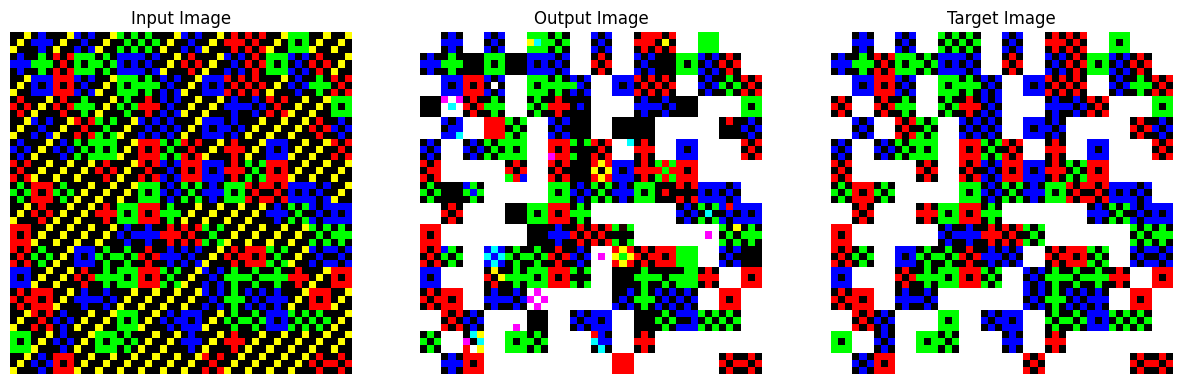

In [98]:
ready_to_use_model = load_model('image_to_image_model.h5')


image_path = './data/10_test.png'


input_img = load_img(image_path, target_size=(48, 48))  # Указываем целевой размер
input_img = img_to_array(input_img)
input_img = np.expand_dims(input_img, axis=0)  # Добавляем размерность батча

# Применение модели к входному изображению
output_img = model.predict(input_img)

# Загрузка эталонного изображения
target_image_path = image_path.replace("_test.png", "_etalon.png")
target_img = load_img(target_image_path, target_size=(48, 48))
target_img = img_to_array(target_img)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(input_img.squeeze())
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Output Image')
plt.imshow(output_img.squeeze())
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Target Image')
plt.imshow(target_img.squeeze())
plt.axis('off')

plt.show()